# Machine Learning for Employee Retention

Retaining its valuable and talented employees is vital to a company's success. Studies have shown that cost related to directly replacing an employee can be as high as 50–60% of the employee’s annual salary, and the total cost of turnover can reach as high as 90–200% of the employee’s annual salary. Even worse, frenquent employee turnover can destroy the company morale, resulting in decreased performance in the workplace.  

A novel approach to implementing an effective retention program and preventing key workers from leaving prematurely is to use machine learning techniques. So the goal of this project is to build a supervised binary classification model using a simulated dataset containing a series of employee-related features and a binary class label of whether the employee left or not. The expected outcome of this project is to help the management and the human resource team in the company  
1). to predict which current employee is going to leave (class label) so that they can intervene immediately;   
2). to identify which are the most important factors (features) that lead to employee turnover so that changes can be implemented to ensure employees remain in place while maintaining high work performance and productivity. 

## 0. Environment Setup

In [1]:
# basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set_style('white') 
%matplotlib inline

# sklean import
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV

In [2]:
%load_ext version_information
%version_information numpy, pandas, matplotlib, seaborn, sklearn

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
seaborn 0.7.1
sklearn 0.17.1
Fri Apr 28 11:46:11 2017 PDT

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Analysis
### Data Exploration

In [4]:
# load data
data = pd.read_csv('../data/HR_Analytics.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


*Points to Note*: 
- No null values in the dataset 
- `'left'` is the target variable 
- `'department'` and `'salary'` are categorical features, others seem to be numerical features  

In [6]:
# more details about the numerical variables
data.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


*Some Observations*: 
- `'satisfaction_level'` and `'last_evaluation'` are float numbers between 0 and 1 
- `'work_accident'` should be a categorical feature with 2 levels: 0 - w/o accident and 1 - w/ work accident 
- `'promotion_last_5years'` should also be a categorical feature with 2 levels: 0 - w/o promotion and 1 - w/ promotion 
- the target variable `'left'` is also a categorical variable with 2 levels: 0 - did not leave and 1 - left 

In [7]:
# target variable class distribution 
left = data['left'].sum()

print('Total number of employees in the dataset is {}'.format(data.shape[0])) 
print('Number of employees who left is {} and is {:.2f}% of the total employees'.format(left, 100*left/data.shape[0]))

Total number of employees in the dataset is 14999
Number of employees who left is 3571 and is 23.81% of the total employees


*Note*: the dataset has unbalanced class distribution. The positive class consists less than 25% of the dataset.

### Exploratory Visualization 

#### Numerical Features

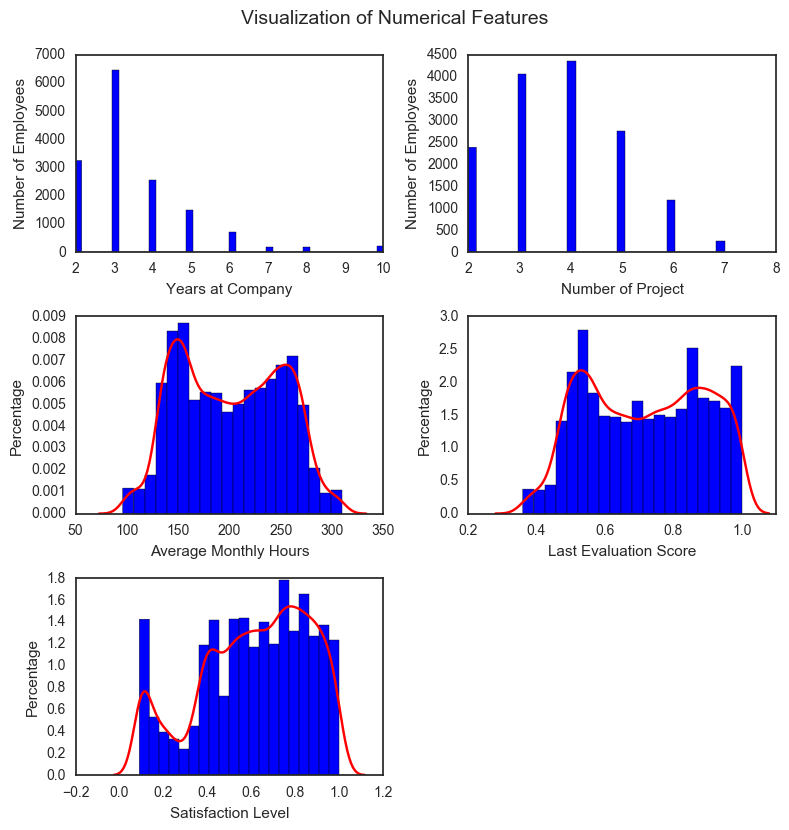

In [8]:
# visualize numerical features
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(321)
sns.distplot(data['time_spend_company'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax1)
ax1.set_xlabel('Years at Company')
ax1.set_ylabel('Number of Employees')

ax2 = fig.add_subplot(322)
sns.distplot(data['number_project'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax2)
ax2.set_xlabel('Number of Project')
ax2.set_ylabel('Number of Employees')

ax3 = fig.add_subplot(323)
sns.distplot(data['average_monthly_hours'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, bins=20, ax=ax3)
ax3.set_xlabel('Average Monthly Hours')
ax3.set_ylabel('Percentage')

ax4 = fig.add_subplot(324)
sns.distplot(data['last_evaluation'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, bins=20, ax=ax4)
ax4.set_xlabel('Last Evaluation Score')
ax4.set_ylabel('Percentage')

ax5 = fig.add_subplot(325)
sns.distplot(data['satisfaction_level'], hist_kws={'color': 'blue', 'alpha': 1}, \
             kde_kws={'color': 'red'}, bins=20, ax=ax5)
ax5.set_xlabel('Satisfaction Level')
ax5.set_ylabel('Percentage')

fig.suptitle('Visualization of Numerical Features', fontsize=14, y=1.03)
plt.tight_layout()

*Some Observations*: 
- `'time_at_company'` and `'number_project'` are discrete numerical variables. It seems this dataset only consider employees at the company for 2 or more years with 2 or more projects. 
- `'average_monthly_hours'`, `'last_evaluation'` and `'satisfaction_level'` take continuous values and all show bimodal distributions. 

#### Categorical Features

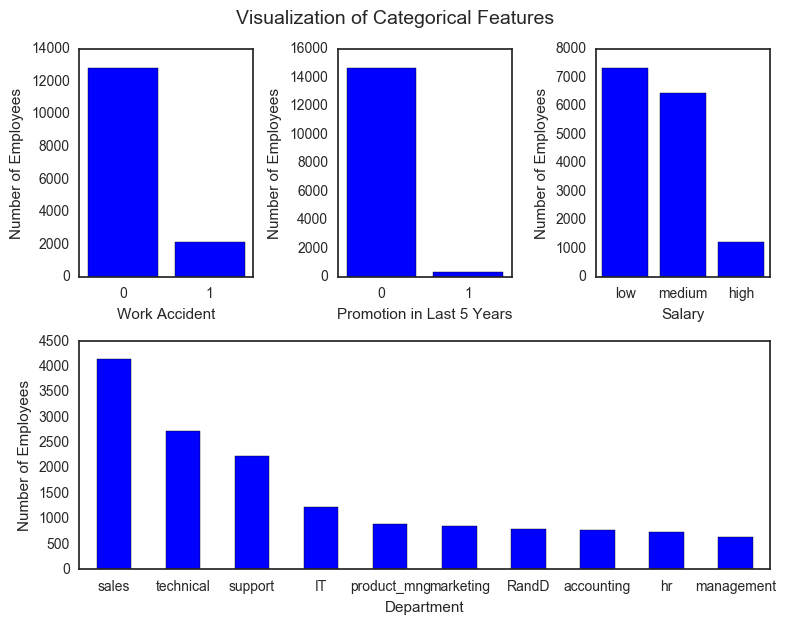

In [9]:
# visualization of characterization features
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=1)
ax1 = sns.countplot(x='work_accident', data=data, ax=ax1, saturation=1, facecolor='blue')
ax1.set_xlabel('Work Accident')
ax1.set_ylabel('Number of Employees')

ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
ax2 = sns.countplot(x='promotion_last_5years', data=data, ax=ax2, saturation=1, facecolor='blue')
ax2.set_xlabel('Promotion in Last 5 Years')
ax2.set_ylabel('Number of Employees')

ax3 = plt.subplot2grid((2, 3), (0, 2), colspan=1)
ax3 = sns.countplot(x='salary', data=data, ax=ax3, saturation=1, facecolor='blue')
ax3.set_xlabel('Salary')
ax3.set_ylabel('Number of Employees')

ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=3)
data['department'].value_counts().plot(kind='bar', color='blue')
#sns.countplot(x='department', data=data, ax=ax4, palette='coolwarm')
for tick in ax4.get_xticklabels():
    tick.set_rotation(0)
ax4.set_xlabel('Department')
ax4.set_ylabel('Number of Employees')

fig.suptitle('Visualization of Categorical Features', fontsize=14, y=1.03)
plt.tight_layout()

*Some Observations*: 
- `'work_accident'` and `'promotion_last_5years'` are two-level categorical variables. Both show very unbalanced distribution (with the majority being category 0: no work accident/no promotion in last 5 years) 
- `'salary'` has 3 levels: low, medium and high. The salary structure seems to reflect the reality, with only a small fraction of employees having high salary. 
- Employees from 10 different departments are considered in the dataset, with the majority of employees from sales, technical and support. This also somewhat reflects the reality in many companies. 

#### Correlation Matrix

In [10]:
# convert 'salary' to numerical representation in order to include it in correlation matrix
data['salary'] = data['salary'].map({'low': 0, 'medium': 1, 'high': 2})

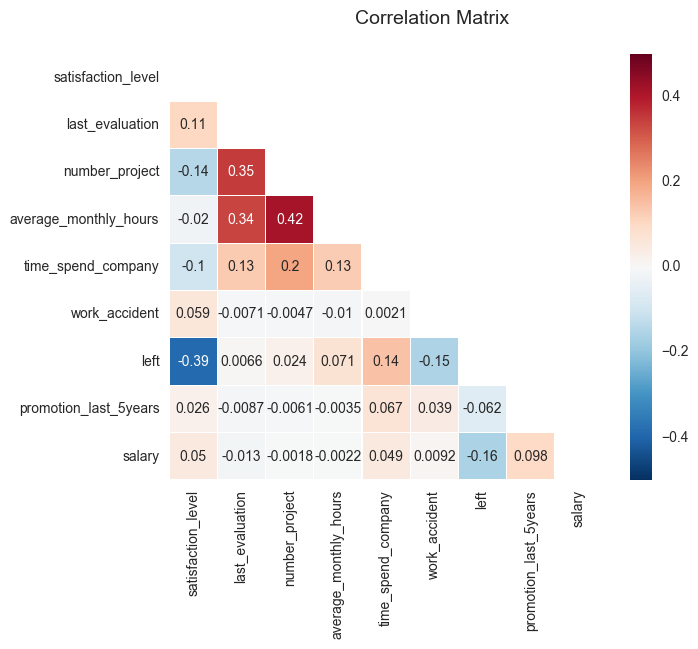

In [11]:
# calculate correlation
corr = data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(7, 5.5))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, vmax=0.5,linewidths=0.1)
fig.suptitle('Correlation Matrix', fontsize=14)

*Some observations made from the correlation matrix (excluding variable `'department'`)*: 
- There is a strong negative correlation between `'satisfaction_level'` and `'left'` with correlation coefficient of -0.39
- Variables `'number_project'`, `'average_monthly_hours'`, and `'last_evaluation'` show strong positive correlations, which makes sense intuitively. 

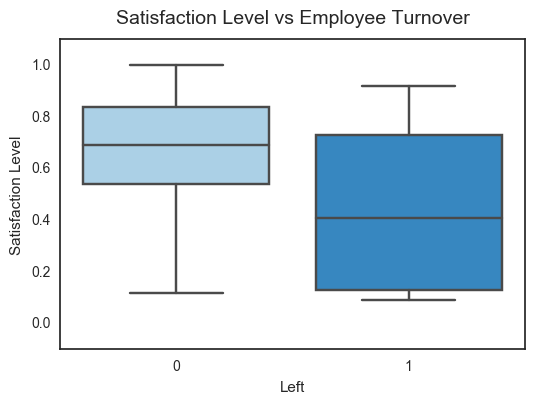

In [12]:
# satisfaction_level vs left
sns.boxplot(x='left', y='satisfaction_level', data=data, palette='Blues', saturation=1)
plt.xlabel('Left')
plt.ylabel('Satisfaction Level')
plt.ylim([-0.1, 1.1])
plt.title('Satisfaction Level vs Employee Turnover', fontsize=14, y=1.03)

Employees who left have significantly lower median satisfaction level but the distribution of satisfaction level is actually quite broad, i.e., there are employees with high satisfaction level who also left.

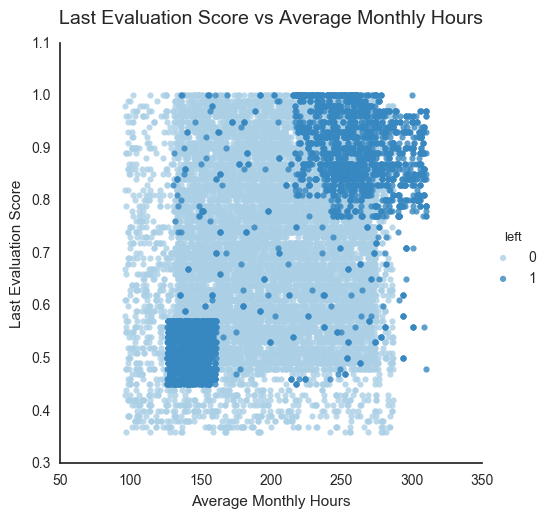

In [13]:
# evaluation and average monthly hours
sns.lmplot(x='average_monthly_hours', y='last_evaluation', hue='left', data=data, fit_reg=False, palette='Blues')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Last Evaluation Score')
plt.title('Last Evaluation Score vs Average Monthly Hours', fontsize=14, y=1.03)

According to the correlation matrix, there is a strong correlation between `'average_monthly_hours'` and `'last_evaluation'`. But by looking at employees who left and who stayed separately, the positive correlation only seems to exist for employees who left. Also, those employees seem to belong to two distinct groups: low evaluation score/low average monthly hours and high evaluation score/high average monthly hours.  

We can combine these two variables with the `'satisfaction_level'` which shows a strong correlation with whether the employees stayed or left.

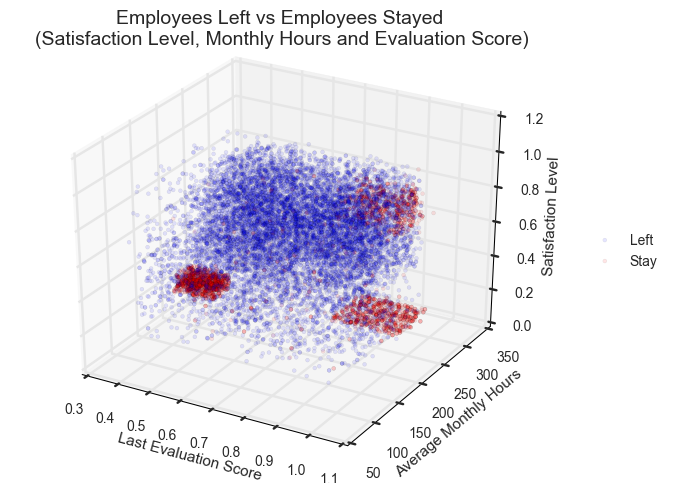

In [14]:
# create 3D plot with variables 'last_evaluation', 'average_monthly_hours' and 'satisfaction_level'
left = data[data['left'] == 1]
stay = data[data['left'] == 0]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(stay['last_evaluation'], stay['average_monthly_hours'], stay['satisfaction_level'], \
           c='blue', s=8, alpha=0.1, label='Left')
ax.scatter(left['last_evaluation'], left['average_monthly_hours'],left['satisfaction_level'], \
           c='red', s=8, alpha=0.1, label='Stay')

ax.set_xlabel('Last Evaluation Score')
ax.set_ylabel('Average Monthly Hours')
ax.set_zlabel('Satisfaction Level')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='right', borderaxespad=0.)
plt.title('Employees Left vs Employees Stayed \n(Satisfaction Level, Monthly Hours and Evaluation Score)', \
          fontsize=14, y=1.03)
plt.tight_layout()

The above 3D plot shows three distinct group of employees who left: 
- **Burnt-out employees**: these employees work the most hours. They received high evaluation scores but they are among those who feel least satisfied. *These are motivated and competent employees. They could potentially be excellent performers but the current role is probably a bad fit for them.*
- **Poor performers**: these employees have low evaluation scores. They spend the least time working and they do not feel very satisfied. *Losing this type of employees might be a good thing for the company but a large number of employees in this category is certainly a red flag for the company.*
- **Excellent performers**: these employees works hard and receive high evaluations. Most importantly, they have very high satisfaction level but they still chose to leave. *These employees are the most valuable to the company. They most likely leave because they need better opportunities for career development.*

## Methodology
### Data Preprocessing

In [15]:
# separate features and labels
features = data.drop('left', axis = 1)
label = data['left']

# categorical variables: one-hot encoding
features['work_accident'] = features['work_accident'].astype('category')
features['promotion_last_5years'] = features['promotion_last_5years'].astype('category')
features['salary'] = features['salary'].astype('category')
features = pd.get_dummies(features, prefix=None, prefix_sep='_')

print("Total number of features after one-hot encoding is {}".format(features.shape[1]))

Total number of features after one-hot encoding is 22


In [16]:
print(features.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident_0',
       'work_accident_1', 'promotion_last_5years_0', 'promotion_last_5years_1',
       'department_IT', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_0', 'salary_1', 'salary_2'],
      dtype='object')


In [17]:
# create transforer class to normalize numerical variables
class FeatureTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, numerical_cols):
        self.numerical_cols = numerical_cols # a list of numerical column names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        '''normalize numerical columns and keep the rest of the columns the same'''
        for col in X.columns:
            if col in self.numerical_cols:
                X[col] = MinMaxScaler().fit_transform(X[col])
            else:
                X[col] = X[col]
        return X

### Metric

In [18]:
# use F2 score as the scoring metric
def f2_score(y_test, y_predict):
    '''return F2 score'''
    return fbeta_score(y_test, y_predict, beta = 2)

scorer = make_scorer(f2_score)

### Benchmark - Naive Classifier

In [19]:
# all employees are leaving 
accuracy = left.shape[0]/features.shape[0]

precision = left.shape[0]/features.shape[0]
recall = left.shape[0]/left.shape[0]
fscore = (1 + 2**2) * (precision * recall) /(2**2 * precision + recall) # beta = 2

print("Accuracy is {:.4f}".format(accuracy))
print("F2 score is {:.4f}".format(fscore))

Accuracy is 0.2381
F2 score is 0.6097


### Implementation

In [20]:
numerical_cols = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours', \
                  'time_spend_company', 'number_project']

In [21]:
# initiate a list of models to test
models = []
models.append(('LR', make_pipeline(FeatureTransformer(numerical_cols), \
                                   LogisticRegression(random_state=0))))
models.append(('LDA', make_pipeline(FeatureTransformer(numerical_cols), \
                                    LinearDiscriminantAnalysis())))
models.append(('KNN', make_pipeline(FeatureTransformer(numerical_cols), \
                                    KNeighborsClassifier())))
models.append(('CART', make_pipeline(FeatureTransformer(numerical_cols), \
                                     DecisionTreeClassifier(random_state=0))))
models.append(('SVC', make_pipeline(FeatureTransformer(numerical_cols), \
                                    SVC(random_state=0))))
models.append(('RF', make_pipeline(FeatureTransformer(numerical_cols), \
                                   RandomForestClassifier(random_state=0))))

In [32]:
# evaluate each model
results = []
names = []
kfold = KFold(n=len(label), n_folds=10, shuffle=True, random_state=0)

for name, model in models:
    cv_results = cross_val_score(model, features, label, cv=kfold, scoring=scorer)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.381705 (0.022324)
LDA: 0.347288 (0.023199)
KNN: 0.887800 (0.015485)
CART: 0.961637 (0.014469)
SVC: 0.529132 (0.025301)
RF: 0.966003 (0.010720)


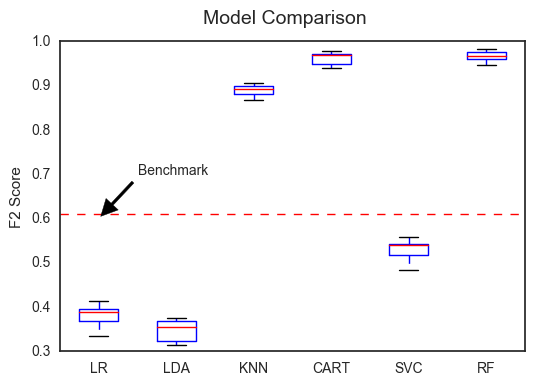

In [89]:
# plot comparison
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.axhline(y=0.6097, linewidth=1, color='r', linestyle='dashed')
ax.annotate('Benchmark', xy=(1, 0.6), xytext=(1.5, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2),
            )
ax.set_xticklabels(names)
ax.set_ylabel('F2 Score')
fig.suptitle('Model Comparison', fontsize=14)

Based on the plot above, Decision Tree classifier and Random Forest have the highest F2 scores, and are much better then the benchmark score. Generally, Random Forest is less likely to overfit the data. So it will be chosen as the best model.

### Refinement

With the Random Forest model, `GridSearchCV` can be used to find the best hyperparameters

In [50]:
from sklearn.grid_search import GridSearchCV
parameters = {'randomforestclassifier__n_estimators': [10, 20, 50], \
              'randomforestclassifier__min_samples_split': [2, 5, 10, 50]} 

rf_clf = make_pipeline(FeatureTransformer(numerical_cols), RandomForestClassifier(random_state=0))
grid_obj = GridSearchCV(rf_clf, parameters, scoring = scorer, cv=kfold)
grid_fit = grid_obj.fit(features, label)

In [51]:
# the best parameters
grid_fit.best_params_

{'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 50}

In [52]:
# the cross validatin F2 score with this best model
grid_fit.best_score_

0.97536570301839209

The above cross validation F2 score improves slightly compared to the original 0.966003 from an out-of-box Random Forest model.

### Learning Curve and Confusion Matrix

In [62]:
best_clf = make_pipeline(FeatureTransformer(numerical_cols), \
                         RandomForestClassifier(n_estimators=50, min_samples_split=2, random_state=0))

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

In [64]:
# different training set size
sample_1 = round(0.01 * X_train.shape[0])
sample_5 = round(0.05 * X_train.shape[0])
sample_10 = round(0.1 * X_train.shape[0])
sample_20 = round(0.2 * X_train.shape[0])
sample_50 = round(0.5 * X_train.shape[0])
sample_100 = X_train.shape[0]

# obtain traning and test scores for models trained with different sample size
train_results = []
test_results = []
for i, samples in enumerate([sample_1, sample_5, sample_10, sample_20, sample_50, sample_100]):
    best_clf.fit(X_train[:samples], y_train[:samples])
    pred_train = best_clf.predict(X_train[:samples])
    pred_test = best_clf.predict(X_test)
    train_results.append(fbeta_score(y_train[:samples], pred_train, beta=2))
    test_results.append(fbeta_score(y_test, pred_test, beta=2))

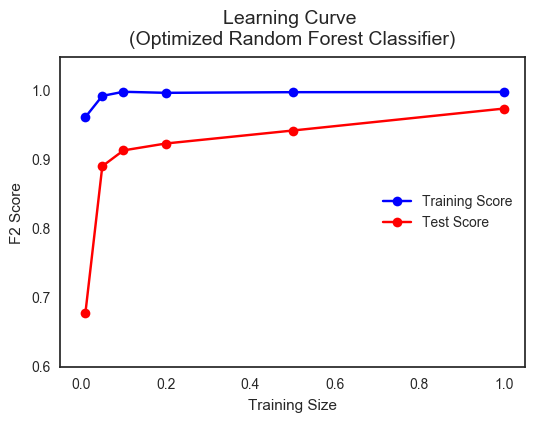

In [90]:
# plot learning curve
index = [0.01, 0.05, 0.1, 0.2, 0.5, 1]

plt.plot(index, train_results, 'o-', color='blue', label='Training Score')
plt.plot(index, test_results, 'o-', color='red', label='Test Score')
plt.xlim([-0.05, 1.05])
plt.ylim([0.60, 1.05])
plt.xlabel('Training Size')
plt.ylabel('F2 Score')
plt.legend(bbox_to_anchor=(1, 0.5), loc='right')
plt.title('Learning Curve \n(Optimized Random Forest Classifier)', fontsize=14, y=1.02)

The learning curves converge as the number of training points increases. With all 100% of the training data (80% of the original dataset) used for training the model, the training score and the test score are close, indicating that the model generalizes well to unseen data.

In [67]:
confusion_matrix(y_test, pred_test)

array([[2294,    5],
       [  20,  681]])

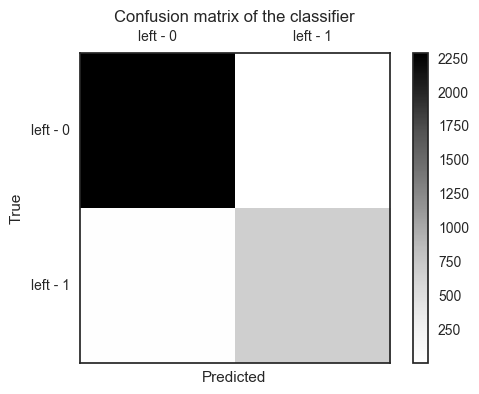

In [88]:
cm = confusion_matrix(y_test, pred_test)
labels = ['left - 0', 'left - 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier', y=1.08)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [68]:
precision = 681/(5+681)
precision

0.9927113702623906

In [69]:
recall = 681/(20 + 681)
recall

0.9714693295292439

### Feature Importance

In [72]:
# find feature importance with best random forest model
best_rf = RandomForestClassifier(n_estimators=50, min_samples_split=2, random_state=0)
best_rf.fit(FeatureTransformer(numerical_cols).fit_transform(X_train), y_train)

# feature importance
importance = best_rf.feature_importances_
# standard deviation of feature importance
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)

In [73]:
# create a dataframe of feature importance
df_importance = pd.DataFrame(X_train.columns.values, columns=['Features'])
df_importance['Importance'] = importance
df_importance['Standard Deviation'] = std

In [74]:
# sort dataframe by descending importance
df_importance.sort_values(by='Importance', ascending=False, inplace=True)

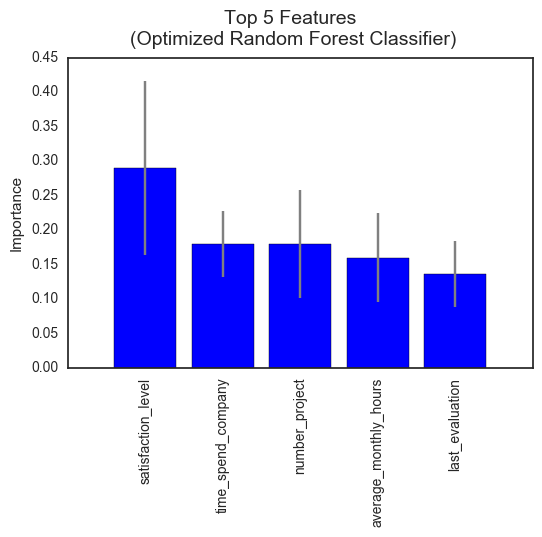

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)
index = [0, 1, 2, 3, 4]
plt.bar(index, df_importance.head(5)['Importance'], color='blue', \
        yerr=df_importance.head(5)['Standard Deviation'], align="center", error_kw={'ecolor': '0.5'})
plt.xticks(index, df_importance.head(5)['Features'])
ax.set_ylabel('Importance')
ax.set_xlabel('')
for tick in ax.get_xticklabels():
        tick.set_rotation(90)
fig.suptitle('Top 5 Features \n(Optimized Random Forest Classifier)', fontsize=14, y=1.02)

In [76]:
# total importance of top 5 features
df_importance.head(5)['Importance'].sum()

0.9465569399880494